# A) API Zugriff im lokalen Netzwerk 

# A) Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

# B) Das ist dein Arbeitsauftrag: 
## ->Arbeitsaufgabe 1: "Dummy - Werte speichern"

### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "b_nachname_dummy_source" - file darin ab. Der Source-Code soll nur die notwendigen Bestandteile enthalten, um das geforderte .json und .db file anzulegen. Bitte kommentiere den Source-Code und alle individuellen Anpassungen! Füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die individuell angepassten dummy - Werte in einem .json File "b_nachname_dummywerte.json"
3. speichere die individuell angepassten dummy - Werte in einer sqlite Datenbank "b_nachname_dummywerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"

## ->Arbeitsaufgabe 2: "Sensor - Werte speichern"
Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.

### TODO: *Ersetze die "dummy-Werte" durch echte Sensordaten. Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "source" - file darin ab. Der Source-Code soll im Unterschied zu Arbeitsaufgabe 1 alle Code-Bestandteile von A1) bis A5) in ausgeführter Form beinhalten und zusätzlich die erforderlichen individuellen Anpassungen inkl. deiner Kommentare. Bitte füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die Sensor - Werte in einem .json File "b_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "b_nachname_sensorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 2 Nachname"



 

# Input zu Arbeitsaufgabe 1 und 2
### ACHTUNG: Die dummy-Werte für Arbeitsaufgabe 1 müssen individuell z.B. mittels Zufallsgenerator erzeugt werden!
### A1) request an das REST API senden und "return-object" analysieren

In [30]:
import requests
import json
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


TODO: 1 Schritt: IP Adresse des Sensors identifizieren! Dazu das Programm "Advanced IP Scanner " installieren
um die IP - Adressen aller Computer im Netzwerk abzufragen. 
Um einen geeigente IP - Range festzulegen, cmd starten - eigene IP Adresse (am Kabel abfragen) und IP - 100 bis IP + 100 scannen. 
Das Gerät ist ein Raspberry Pi und sollte im NW anhand des Namens entsprechend erkannt werden. 

In [31]:
my_url = 'http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity'

In [32]:
hum_value=requests.get(my_url)

In [33]:
type(hum_value)

requests.models.Response

In [ ]:
dir(hum_value)

In [35]:
hum_value.content

b'{"link":"http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","state":"54","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"editable":true,"type":"Number","name":"ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","label":"WZSensor (relative humidity)","category":"Humidity","tags":["Point"],"groupNames":[]}'

In [36]:
my_content=hum_value.content

In [37]:
print(type(my_content))
print(hum_value.encoding)

<class 'bytes'>
utf-8


### A2) dictionary mit json.loads aus dem "return-object" erzeugen

In [38]:
# json.loads requires the decoded bytestring (which is a string) as argument and returns a python dictionary
# .decode togethe with json.loads is optional
print(type(json.loads(my_content.decode("utf-8"))))
json.loads(my_content.decode("utf-8"))

<class 'dict'>


{'link': 'http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity',
 'state': '54',
 'stateDescription': {'pattern': '%.1f', 'readOnly': True, 'options': []},
 'editable': True,
 'type': 'Number',
 'name': 'ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity',
 'label': 'WZSensor (relative humidity)',
 'category': 'Humidity',
 'tags': ['Point'],
 'groupNames': []}

### A3) dekodierte Sensor - Messwerte mit "print" ausgeben

In [39]:
# The result - bytestring can be decoded and printed directly as a string without using json.loads , 
# however if you pass it as an argument into the "json-loads" function you can create a dictionary
print(type(my_content.decode()))
print(my_content.decode())

<class 'str'>
{"link":"http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","state":"54","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"editable":true,"type":"Number","name":"ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","label":"WZSensor (relative humidity)","category":"Humidity","tags":["Point"],"groupNames":[]}


### A4) Input Arbeitsaufgabe 1/ Messwerte als .json file speichern

https://docs.python.org/3/library/json.html
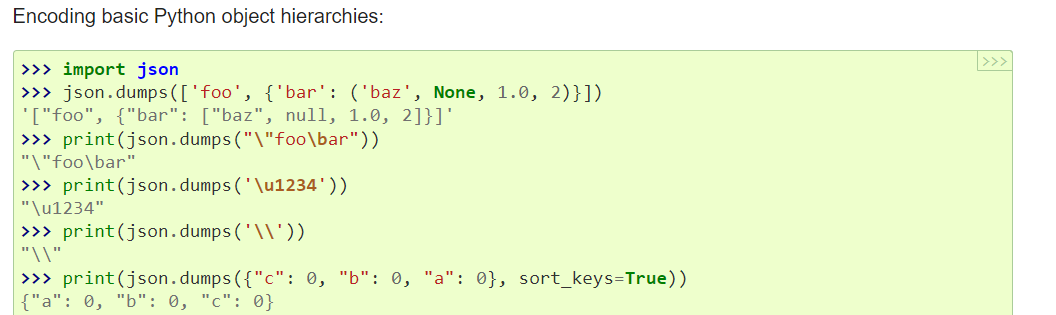

In [1]:
# in order to store the values as a json file, you might create and open a file, 
# continuously get the current sensor readings and finally store them in the json - file
# the code - snippet doesn't meet the requirements of the assignment in terms of time- interval, 
# sensor - readings, etc.

import time
import pandas as pd
import random
my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity','brightness'])
my_timestamp = round(time.time())
for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)
    
    

    act_temp = round(random.uniform(-30.0, 50.0), 2)
    act_hum = round(random.uniform(10, 90), 2)
    act_bright = round(random.uniform(0, 65000), 2)
    input_values = [my_timestamp,act_temp,act_hum,act_bright]
    my_values_df.loc[my_counter]=input_values

filename = "a_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
    

1682670554
1682670555
1682670556
1682670557
1682670558
1682670559
1682670560
1682670561
1682670562
1682670563


In [2]:
#retrieve values from .json file via 
pd.read_json(filename)

,timestamp,temperature,humidity,brightness
0,2023-04-28 08:29:14,34.14,21.50,42255.50
1,2023-04-28 08:29:15,17.37,67.01,2668.31
2,2023-04-28 08:29:16,-12.63,27.30,50419.36
3,2023-04-28 08:29:17,14.09,87.55,51102.14
4,2023-04-28 08:29:18,45.14,11.91,25828.40
5,2023-04-28 08:29:19,18.58,83.64,30055.41
6,2023-04-28 08:29:20,4.33,20.05,38495.89
7,2023-04-28 08:29:21,29.87,75.70,63249.09
8,2023-04-28 08:29:22,16.46,70.32,44210.78
9,2023-04-28 08:29:23,45.66,33.16,20514.56


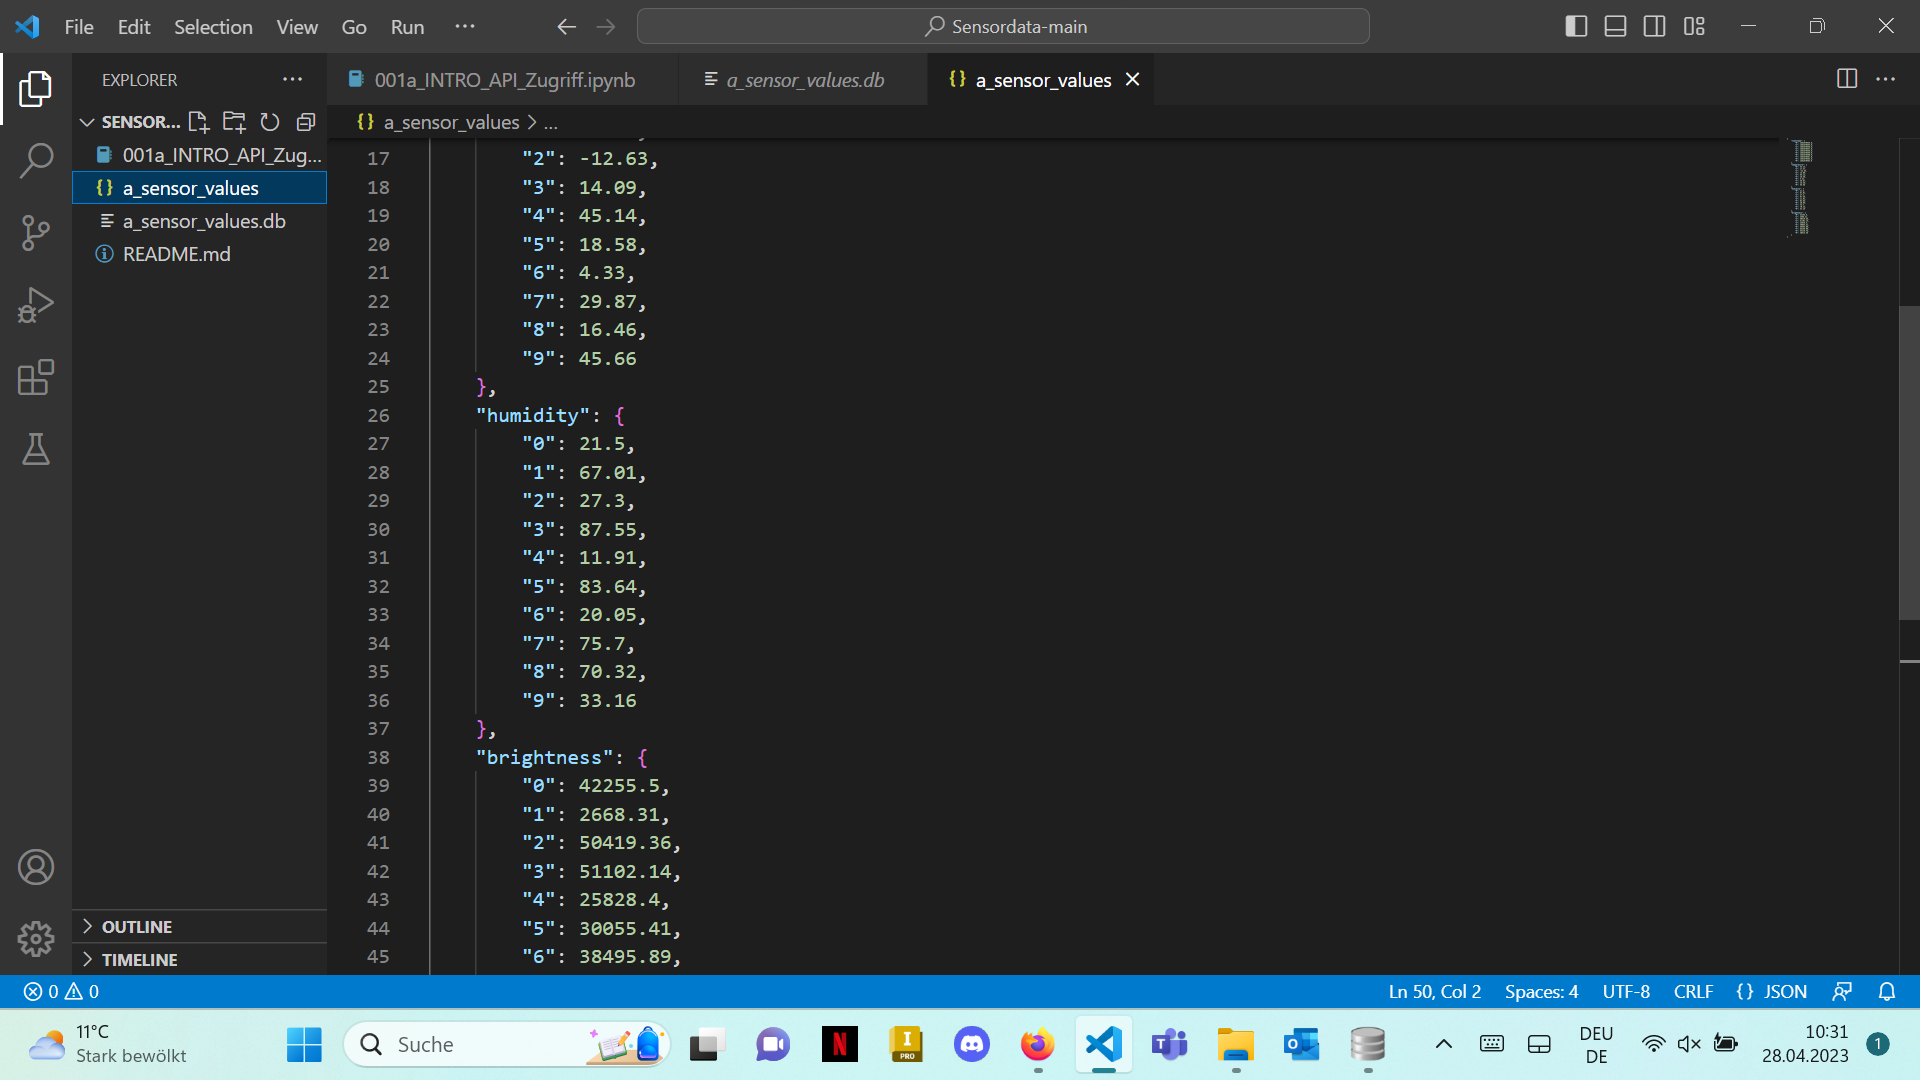

### A5) Input Arbeitsaufgabe 1/ Messwerte fortlaufend in einem .db file mitschreiben

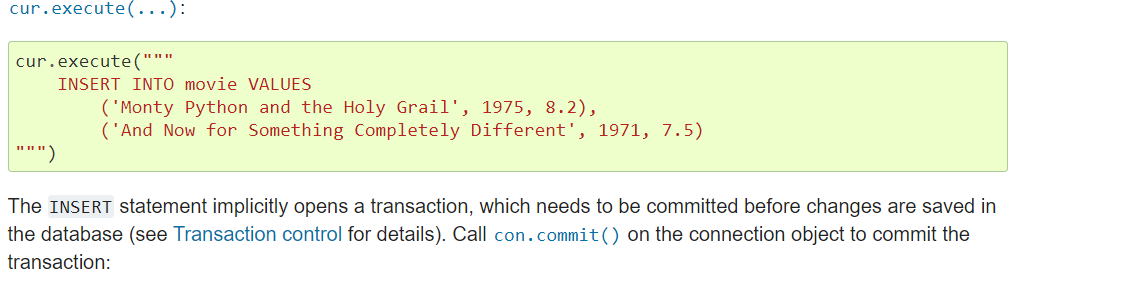

In [3]:
#!pip install sqlite3
import sqlite3

#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'a_sensor_values.db' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC, humidity NUMERIC, brightness NUMERIC);''')

for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)

    act_temp = round(random.uniform(-30.0, 50.0), 2)
    act_hum = round(random.uniform(10, 90), 2)
    act_bright = round(random.uniform(0, 65000), 2)
# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_bright})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()

a_sensor_values.db
1682670589
INSERT INTO sensor_values VALUES (1682670589, 38.51, 52.62, 44740.37)
1682670590
INSERT INTO sensor_values VALUES (1682670590, 34.64, 86.23, 11352.52)
1682670591
INSERT INTO sensor_values VALUES (1682670591, -14.29, 78.64, 10800.73)
1682670592
INSERT INTO sensor_values VALUES (1682670592, 48.15, 60.05, 6213.7)
1682670593
INSERT INTO sensor_values VALUES (1682670593, 28.93, 11.66, 8886.59)
1682670594
INSERT INTO sensor_values VALUES (1682670594, 35.06, 75.65, 58364.65)
1682670595
INSERT INTO sensor_values VALUES (1682670595, -24.3, 18.28, 14967.49)
1682670596
INSERT INTO sensor_values VALUES (1682670596, 45.07, 71.14, 4511.65)
1682670597
INSERT INTO sensor_values VALUES (1682670597, -9.3, 81.43, 36109.17)
1682670598
INSERT INTO sensor_values VALUES (1682670598, -21.05, 17.5, 62910.41)


In [4]:
# fetch values directly from db cursor
cur.execute("SELECT * FROM sensor_values")
print(cur.fetchall())

[(1682670589, 38.51, 52.62, 44740.37), (1682670590, 34.64, 86.23, 11352.52), (1682670591, -14.29, 78.64, 10800.73), (1682670592, 48.15, 60.05, 6213.7), (1682670593, 28.93, 11.66, 8886.59), (1682670594, 35.06, 75.65, 58364.65), (1682670595, -24.3, 18.28, 14967.49), (1682670596, 45.07, 71.14, 4511.65), (1682670597, -9.3, 81.43, 36109.17), (1682670598, -21.05, 17.5, 62910.41)]


In [5]:
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)

,timestamp,temperature,humidity,brightness
0,1682670589,38.51,52.62,44740.37
1,1682670590,34.64,86.23,11352.52
2,1682670591,-14.29,78.64,10800.73
3,1682670592,48.15,60.05,6213.70
4,1682670593,28.93,11.66,8886.59
5,1682670594,35.06,75.65,58364.65
6,1682670595,-24.30,18.28,14967.49
7,1682670596,45.07,71.14,4511.65
8,1682670597,-9.30,81.43,36109.17
9,1682670598,-21.05,17.50,62910.41


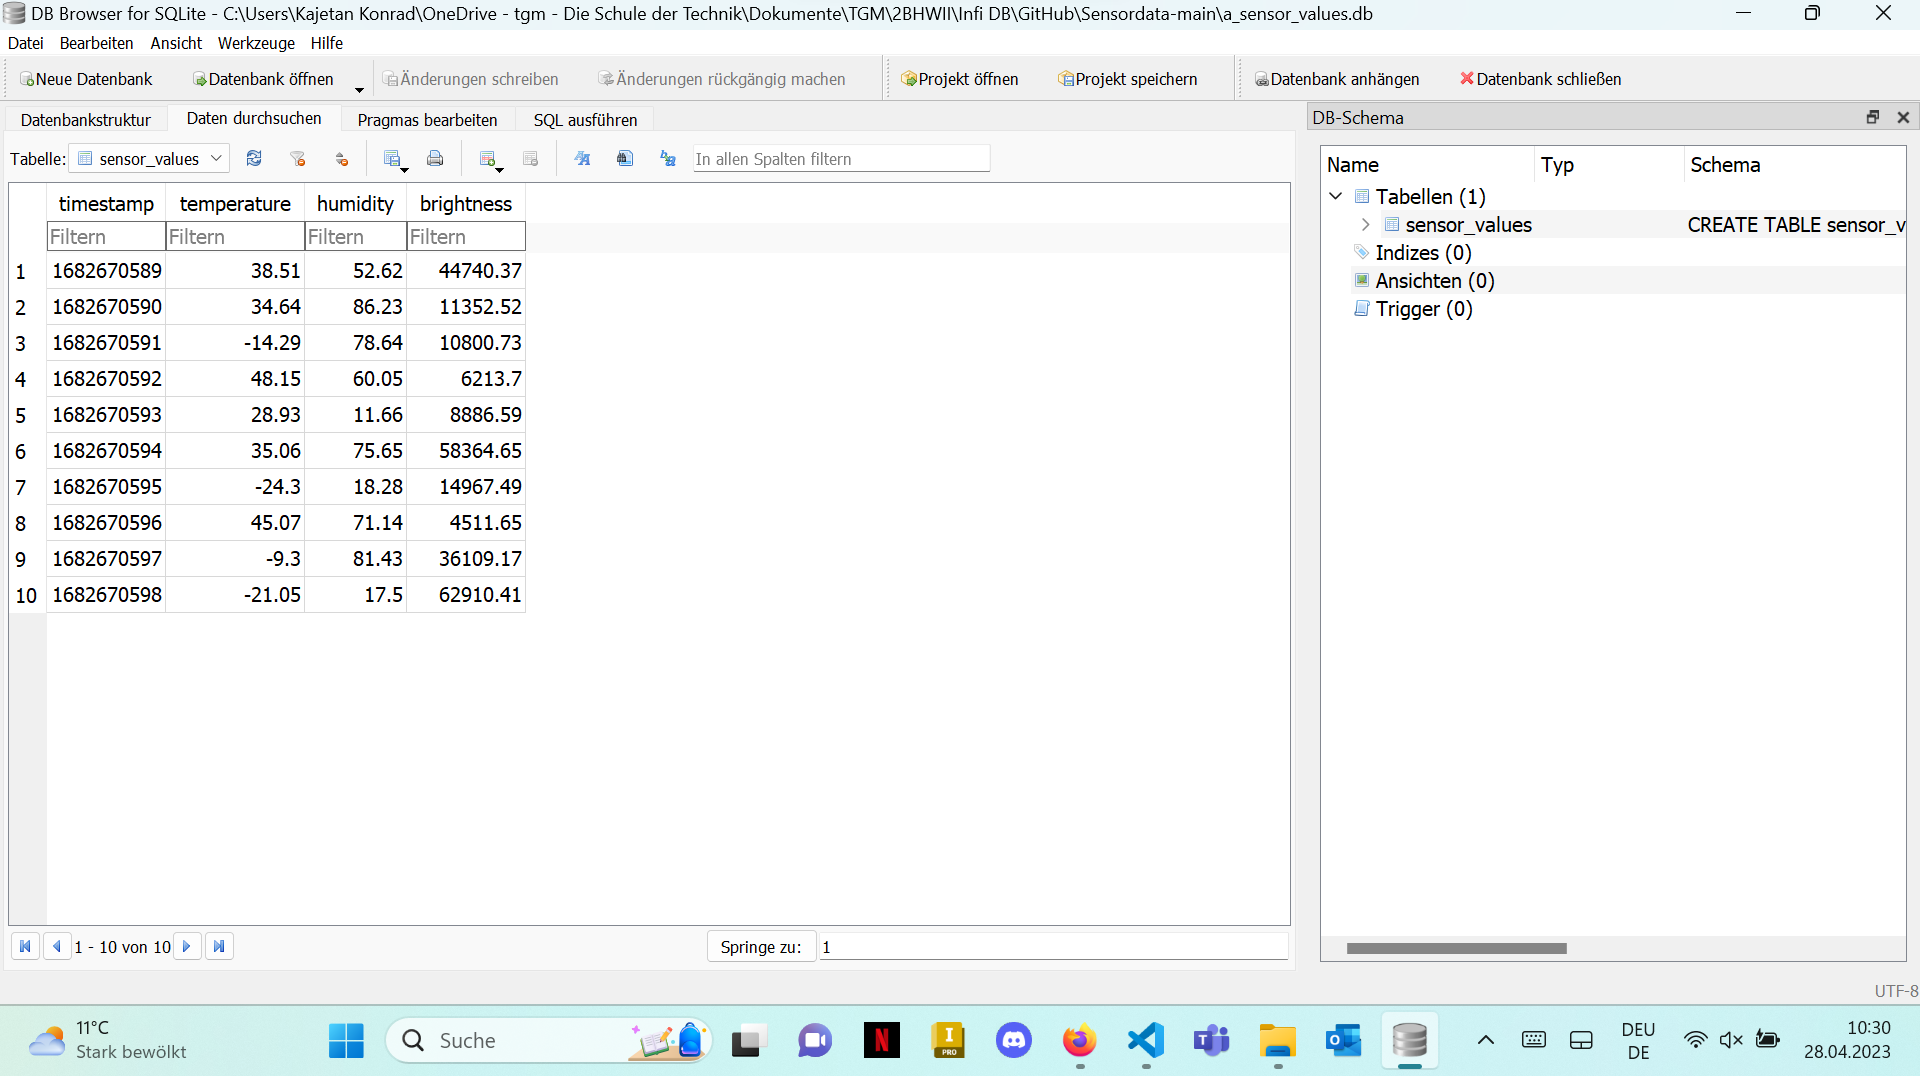